### Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

### Attribute Information:

#### Name -- Data Type -- Measurement -- Description
1. Cement (cement)                 -- quantitative     -- kg in a m3 mixture    --Input Variable

2. Blast Furnace Slag (slag)       -- quantitative     -- kg in a m3 mixture    -- Input Variable

3. Fly Ash (ash)                   -- quantitative     -- kg in a m3 mixture    -- Input Variable

4. Water (water)                   -- quantitative     -- kg in a m3 mixture    -- Input Variable

5. Superplasticizer (superplastic) -- quantitative     -- kg in a m3 mixture    -- Input Variable

6. Coarse Aggregate (coarseagg)    -- quantitative     -- kg in a m3 mixture    -- Input Variable

7. Fine Aggregate (fineagg)        -- quantitative     -- kg in a m3 mixture    -- Input Variable

8. Age(age)                        -- quantitative     -- Day (1~365)           -- Input Variable

9. Concrete compressive strength(strength)-- quantitative -- MPa               --Output Variable

##### N/B: Given the variable name, variable type, the measurement unit and a brief description shows that the concrete compressive strength  prediction is a regression problem

In [66]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
df = pd.read_csv('concrete.csv') 

In [7]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [36]:
cols = ['cement','slag','ash','strength']
for col in cols:
    x = df.groupby(col)['strength'].mean() #expecting aggregated metrics
    print(x)

cement
102.0    13.747500
108.3    14.967500
116.0    17.435000
122.6    17.787500
132.0    33.305000
           ...    
522.0    62.750000
525.0    52.624286
528.0    56.830000
531.3    52.520000
540.0    64.294444
Name: strength, Length: 278, dtype: float64
slag
0.0      31.59949
11.0     17.53500
13.6     31.65200
15.0     28.22400
17.2     55.65000
           ...   
290.2    24.91500
305.3    30.66000
316.1    29.81500
342.1    30.81000
359.4    32.43000
Name: strength, Length: 185, dtype: float64
ash
0.0      36.771784
24.5     42.812667
59.0     57.230000
60.0     64.020000
71.0     28.630000
           ...    
194.0    24.580000
194.9     8.540000
195.0    15.923333
200.0    15.090000
200.1    15.090000
Name: strength, Length: 156, dtype: float64
strength
2.33      2.33
3.32      3.32
4.57      4.57
4.78      4.78
4.83      4.83
         ...  
79.40    79.40
79.99    79.99
80.20    80.20
81.75    81.75
82.60    82.60
Name: strength, Length: 845, dtype: float64


In [55]:
A = [df.cement,]
for column in df.columns:
    print(df.loc[:,column].median())

272.9
22.0
0.0
185.0
6.4
968.0
779.5
28.0
34.445


In [56]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [65]:
cols = ['cement','slag']
for i in cols:
    print(df[i].mean())

281.1678640776698
73.89582524271844


In [5]:
df.shape

(1030, 9)

## Deliverable – 1 (EDA)

### Univariate Analysis 

In [6]:
df.isnull().values.any()   # If there are any null values in data set

False

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### All input variables are of the float type except Age which is an integer as expected. 

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Some degree of skewness could be observed from how far the mean is from the Q2, how close is Q2 to the Q3 and the sharp increase in magnitude while moving from Q3 to Max. This would be quantified further using skew() function. 

In [9]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

`a symmetrical distribution would have a skewness of zero, while positive (right skewed) and negative (left skewed) values are non symmetrical. This shows that aside input variable *water*, other input variables including target response relatively have some level of skewness. some are severe while others are mild. A visual exploration would give a better picture` 

### Visual Univariate exploration of features and their distribution 

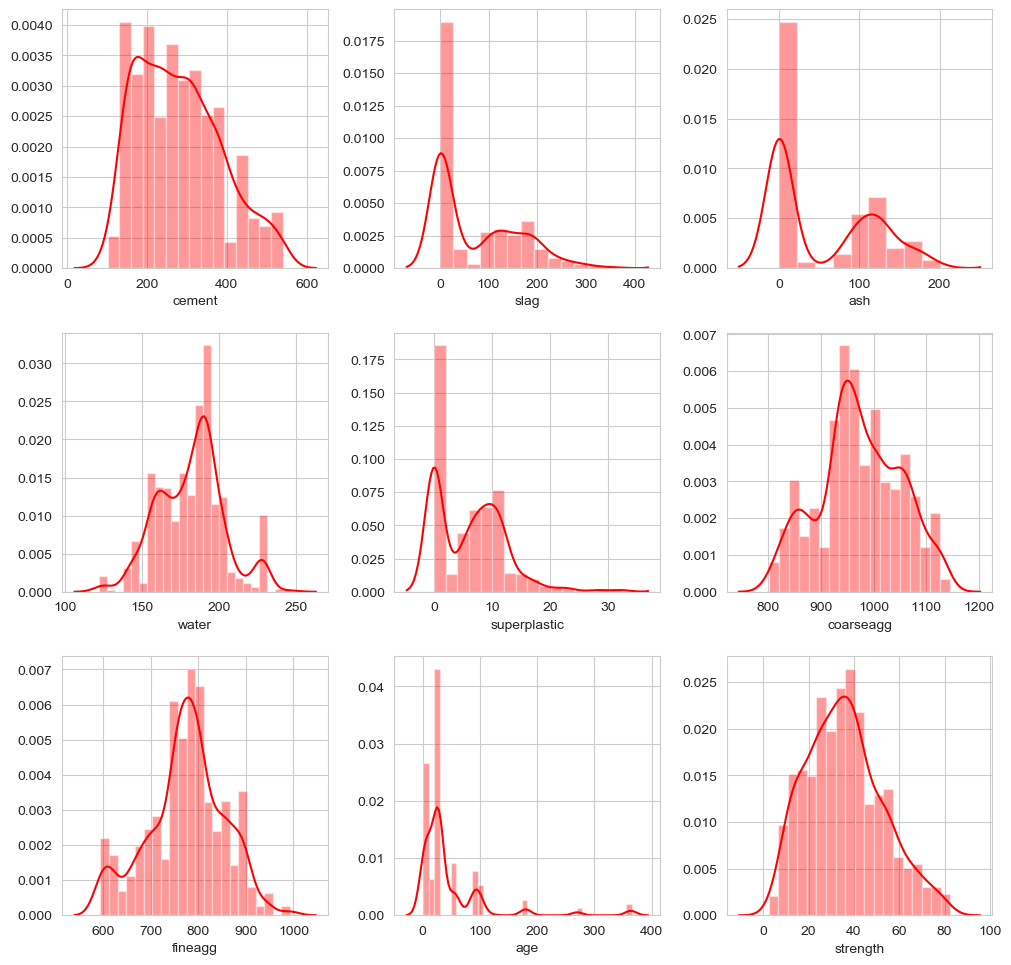

In [12]:
fig = plt.figure(figsize=[12,12], dpi=100)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_style("whitegrid")
col = df.columns.tolist()
j = 1
for i in col:
    ax = fig.add_subplot(3,3,j)
    sns.distplot(df[i], ax=ax, color = 'r', kde =True)
    j = j+1
    if j>len(col):
        break
plt.show()

`Observations:`

`severe skewness is seen in slag, ash, superplastic and age which are all right skewed`

`coarseagg and fineagg are left skewed`

`Water is almost normally distributed`

`Strength as the target variable have approximately 95% of its data lying within 2 standard deviation of the mean`

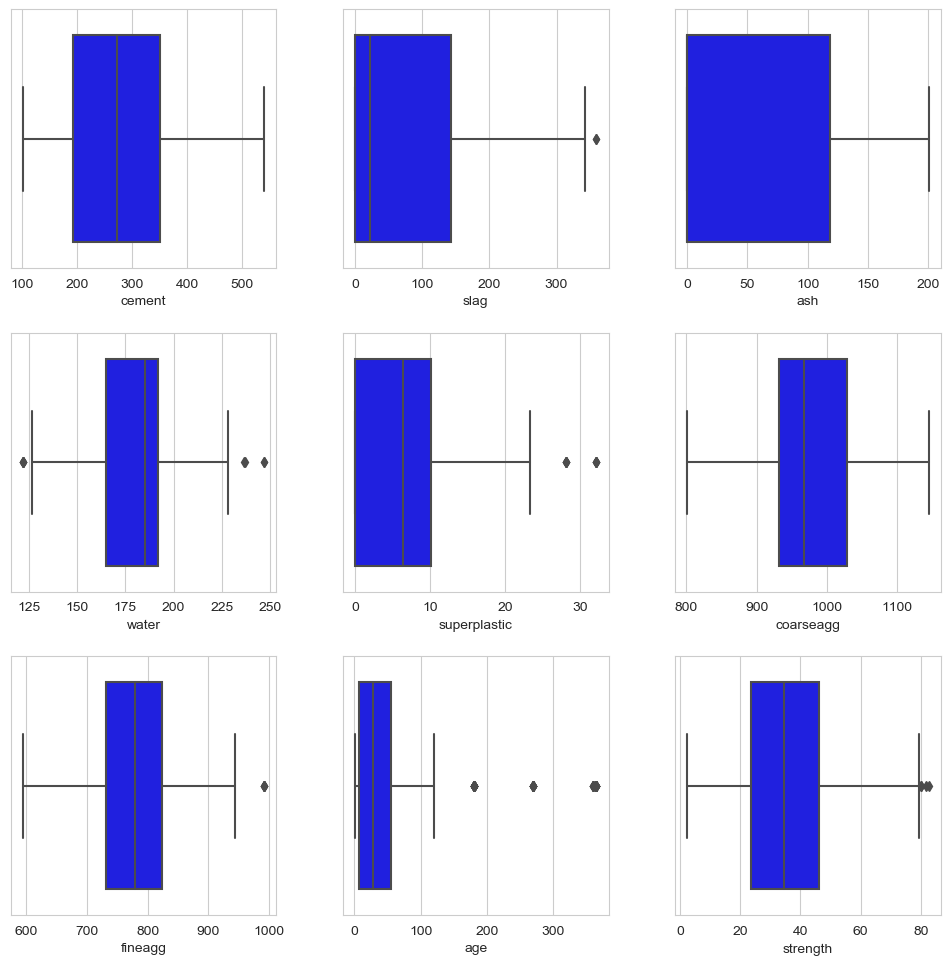

In [13]:
fig = plt.figure(figsize=[12,12], dpi=100)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_style("whitegrid")
col = df.columns.tolist()
j = 1
for i in col:
    ax = fig.add_subplot(3,3,j)
    sns.boxplot(df[i], ax=ax, color = 'b')
    j = j+1
    if j>len(col):
        break
plt.show()

`there are fewer outliers that might not necessarily impact the overall performance of the model that would be used as other measures like regularization would be put in place to ensure the outliers don't impact the general performance of the model. The data in this form can be used for training.`

## Deliverable 2 - Bi-Variate analysis

#### Relationship between predictor variables & between predictor variables and target column would be carriied out using pairplot (for visualization) and heatmap (to quanitfy relationships)

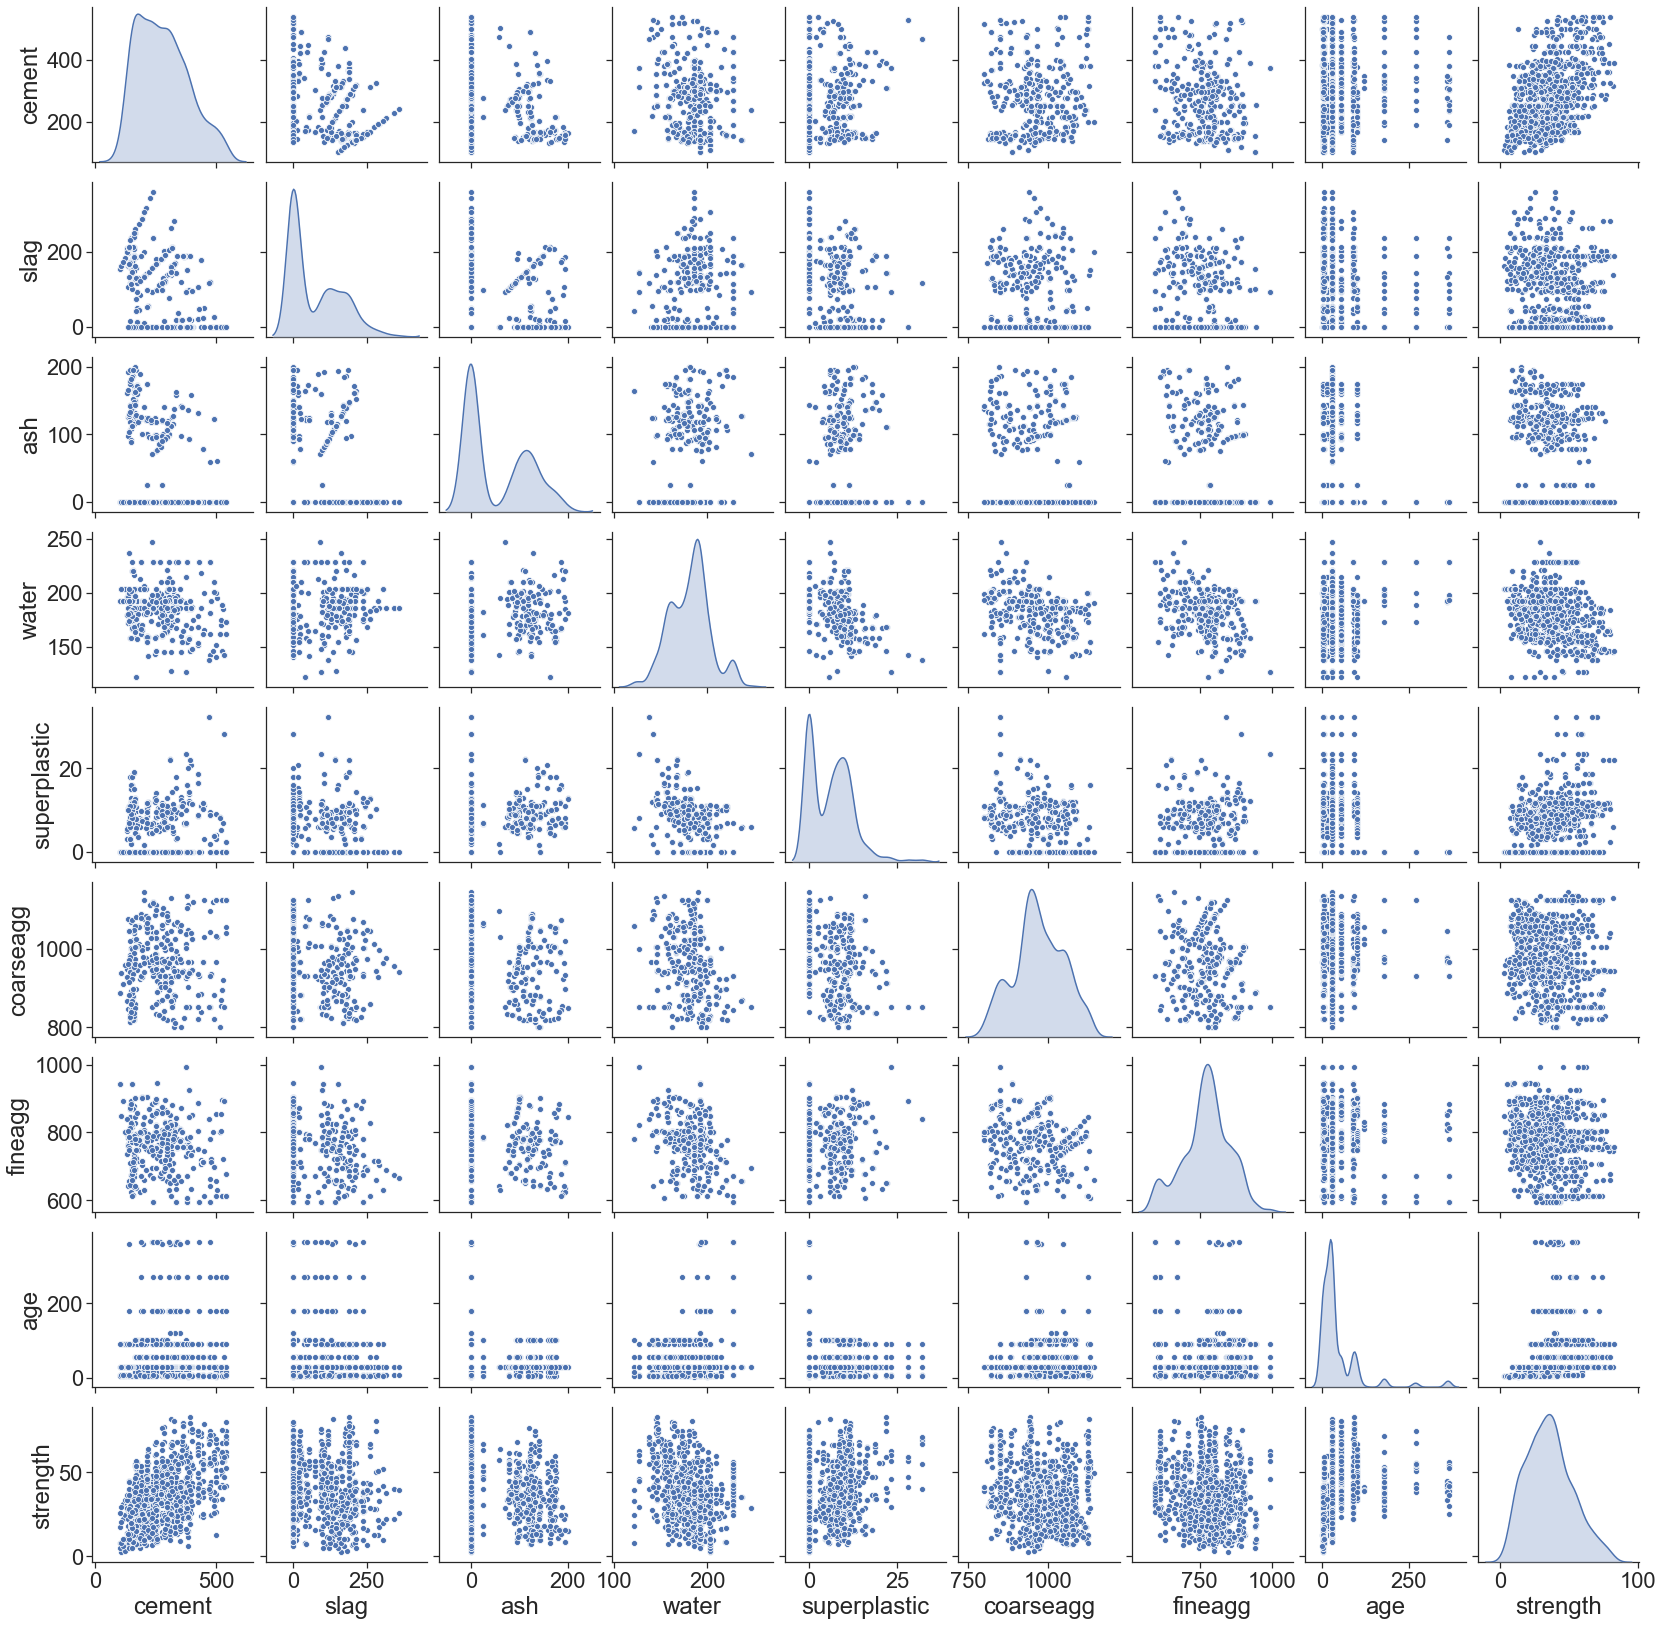

In [14]:
sns.set(style='ticks',font_scale=2);
sns.pairplot(df, diag_kind='kde');

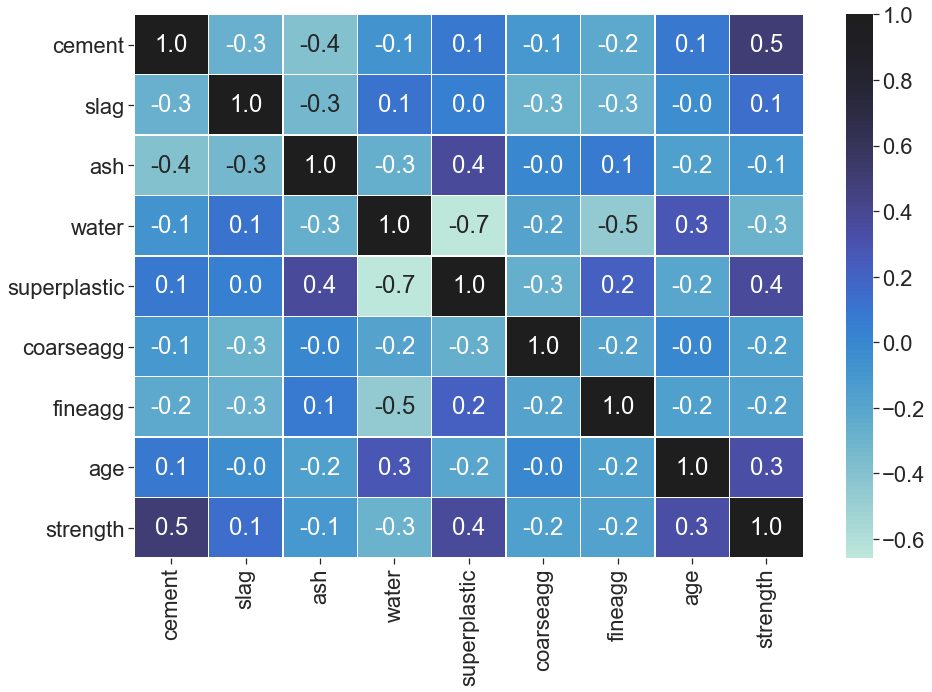

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

`water and superplastic seems to have relatively high negative correlation and would be noted for multicollinearity problem if it's impact is significant. This would be investigated further using the Statsmodel library`

`Other independent variables are actually independent to each other as they are poorly correlated to each other. No clear relationship`

`With reference to the target column and the independent variables, cement seems to be a better predictor among the independent variables as its correlation value is relatively higher compared to other independent variables`

## Deliverable 3 -  Feature Engineering 

#### Identifying Opportunity to extract or drop features from existing features 

`Ordinary Least Square (OLS) Using Statsmodel library to get R type outputs would be first used for Inferential statistics which will gide the model building processes`

`Opportunities to extract or drop some features would be first assessed using result from the Statsmodel library`

#### ------------------------------------------- Using Statsmodel library to get R type outputs -----------------------------------------------------

In [25]:
import statsmodels.formula.api as smf
stat = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = df).fit()
stat.params

Intercept      -23.331214
cement           0.119804
slag             0.103866
ash              0.087934
water           -0.149918
superplastic     0.292225
coarseagg        0.018086
fineagg          0.020190
age              0.114222
dtype: float64

In [26]:
print(stat.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          6.29e-206
Time:                        08:58:07   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -23.3312     26.586     -0.878   

##### Observations 
` The t -test gave a negative value for the independent variable 'water', this might be the major variable contributing to that little change between the Adj R-square and R-square. As early identified, it has a strong corelation with superplastic. However, the P>|T| test gave a value of zero which shows that the impact of this variable is not significant enough to impact the overall quality of the model.`

`Since the difference between the adj. R-squared and R-square is not very significant, it can be said that there might not be a need to drop any variable. Variables are dropped when the difference between R-square and Adj. R-square is very significant`

`The entire independent variables can go into the model building phase`

#### Getting the data model ready & Spliting the data 

In [27]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable, it would be drop.
X = df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe as the dependent variable.
y = df['strength']

In [28]:
from sklearn.model_selection import train_test_split
test_size = 0.30                                      # taking 70:30 training and test set
seed = 1                                              # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [29]:
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721,)
Testing dataset shape: (309, 8) (309,)


#### Based on the OLS performance intially demonstrated, model building would start with linear regression (Ridge and Lasso), linear regression with ploynomial interactions, logistics regression and ensemble techniques. 

## Delverable 4 - Creating the Model and Tunning it

##### Testing different algorithms 

### Model 1: Linear regression without regularization

`Pipeline Object shall be created to enable quick and coherant transformation and model fitting.`

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
# Creating a pipeline object
pipe_Linear = Pipeline([
    ('scaler',StandardScaler()),
    ('lr', LinearRegression())
])

In [32]:
pipe_Linear.fit( X_train, y_train)
pred_Linear = pipe_Linear.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score = cross_val_score(pipe_Linear, X, y, cv=kfold)
print(cv_score)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score.mean()*100.0, cv_score.std()*100.0))

[0.60623239 0.64695454 0.61555076 0.61208575 0.52561826]
Accuracy: 60.129% (4.039%)


In [33]:
Linear_test_score = pipe_Linear.score(X_test, y_test)
Linear_train_score = pipe_Linear.score(X_train, y_train)
Linear_CV_score = (cv_score.mean())

result = pd.DataFrame({'Model' : ['Linear Regression'], 
                       'Training Accuracy_R2' : [Linear_train_score], 
                       'Testing Accuracy_R2' : [Linear_test_score],
                       'mean cross_validation score' : [Linear_CV_score]
                      })
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288


### Model 2: Linear regression(LR) with Ridge Reguarization

In [34]:
from sklearn.linear_model import Ridge

In [35]:
# Creating a pipeline object
pipe_Ridge = Pipeline([
    ('scaler',StandardScaler()),
    ('rige', Ridge())
])

In [36]:
pipe_Ridge.fit(X_train,y_train)
pred_Ridge = pipe_Ridge.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_R = cross_val_score(pipe_Ridge, X, y, cv=kfold)
print(cv_score_R)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_R.mean()*100.0, cv_score_R.std()*100.0))

[0.60652534 0.64739933 0.6153271  0.61175679 0.52544956]
Accuracy: 60.129% (4.053%)


In [37]:
Ridge_test_score = pipe_Ridge.score(X_test, y_test)
Ridge_train_score = pipe_Ridge.score(X_train, y_train)
Ridge_CV_score = (cv_score_R.mean())

result.loc[1] = ['LR with Ridge Reguarization', Ridge_train_score, Ridge_test_score,Ridge_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292


### Model 3: Linear regression(LR) with Lasso Reguarization

In [38]:
from sklearn.linear_model import Lasso

In [39]:
# Creating a pipeline object
pipe_Lasso = Pipeline([
    ('scaler',StandardScaler()),
    ('lasso',Lasso())
])

In [40]:
pipe_Lasso.fit(X_train,y_train)
pred_Lasso = pipe_Lasso.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_las = cross_val_score(pipe_Lasso, X, y, cv=kfold)
print(cv_score_las)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_las.mean()*100.0, cv_score_las.std()*100.0))

[0.57909139 0.61299056 0.54048973 0.55114659 0.49422705]
Accuracy: 55.559% (3.965%)


In [41]:
Lasso_test_score = pipe_Lasso.score(X_test, y_test)
Lasso_train_score = pipe_Lasso.score(X_train, y_train)
Lasso_CV_score = (cv_score_las.mean())

result.loc[2] = ['LR with Lasso Reguarization', Lasso_train_score, Lasso_test_score,Lasso_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589


### Model 4: Linear Model with polynomial features (degree 2 interaction) 

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [43]:
pipe_poly = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('model',LinearRegression())
])

In [44]:
pipe_poly.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
pred_poly = pipe_poly.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_poly = cross_val_score(pipe_poly, X, y, cv=kfold)
print(cv_score_poly)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_poly.mean()*100.0, cv_score_poly.std()*100.0))

[0.68646583 0.75101822 0.72735475 0.75376268 0.70381565]
Accuracy: 72.448% (2.624%)


In [46]:
poly_test_score = pipe_poly.score(X_test, y_test)
poly_train_score = pipe_poly.score(X_train, y_train)
poly_CV_score = (cv_score_poly.mean())

result.loc[3] = ['LR with polynomial interaction', poly_train_score, poly_test_score,poly_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483


### Model 5: Support Vector Machine 

In [47]:
from sklearn.svm import SVR

In [48]:
pipe_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVR())
                    ])

In [49]:
pipe_svm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [50]:
pred_svm = pipe_svm.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_svm = cross_val_score(pipe_svm, X, y, cv=kfold)
print(cv_score_svm)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_svm.mean()*100.0, cv_score_svm.std()*100.0))

[0.66888843 0.65177523 0.60390521 0.64682991 0.614506  ]
Accuracy: 63.718% (2.422%)


In [52]:
svm_test_score = pipe_svm.score(X_test, y_test)
svm_train_score = pipe_svm.score(X_train, y_train)
svm_CV_score = (cv_score_svm.mean())

result.loc[4] = ['Support Vector Regression', svm_train_score, svm_test_score ,svm_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483
4,Support Vector Regression,0.628354,0.640503,0.637181


### Model 6: Decision Tree Regression 

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
pipe_DT = Pipeline([
    ('scaler',StandardScaler()),
    ('DT',DecisionTreeRegressor(max_depth=5))
      ])

In [55]:
pipe_DT.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [56]:
pred_DT = pipe_DT.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_DT = cross_val_score(pipe_DT, X, y, cv=kfold)
print(cv_score_DT)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_DT.mean()*100.0, cv_score_DT.std()*100.0))

[0.6668226  0.73084481 0.74053259 0.75200758 0.7595081 ]
Accuracy: 72.994% (3.304%)


In [57]:
DT_test_score = pipe_DT.score(X_test, y_test)
DT_train_score = pipe_DT.score(X_train, y_train)
DT_CV_score = (cv_score_DT.mean())

result.loc[5] = ['Decision Tree Regression', DT_train_score, DT_test_score ,DT_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483
4,Support Vector Regression,0.628354,0.640503,0.637181
5,Decision Tree Regression,0.801029,0.729024,0.729943


### Model 7: Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
pipe_RF = Pipeline([
    ('scaler',StandardScaler()),
    ('RF',RandomForestRegressor(max_depth=5))
      ])

In [60]:
pipe_RF.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [61]:
pred_RF = pipe_RF.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_RF = cross_val_score(pipe_RF, X, y, cv=kfold)
print(cv_score_RF)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_RF.mean()*100.0, cv_score_RF.std()*100.0))

[0.80519904 0.82326241 0.82720092 0.85120922 0.81996816]
Accuracy: 82.537% (1.491%)


In [62]:
RF_test_score = pipe_RF.score(X_test, y_test)
RF_train_score = pipe_RF.score(X_train, y_train)
RF_CV_score = (cv_score_RF.mean())

result.loc[6] = ['Random Forest Regression', RF_train_score, RF_test_score ,RF_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483
4,Support Vector Regression,0.628354,0.640503,0.637181
5,Decision Tree Regression,0.801029,0.729024,0.729943
6,Random Forest Regression,0.886732,0.823592,0.825368


### Model 8: Bagging Regression

In [63]:
from sklearn.ensemble import BaggingRegressor 

In [64]:
pipe_BR = Pipeline([
    ('scaler',StandardScaler()),
    ('BR', BaggingRegressor())
      ])

In [65]:
pipe_BR.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('BR',
                 BaggingRegressor(base_estimator=None, bootstrap=True,
                                  bootstrap_features=False, max_features=1.0,
                                  max_samples=1.0, n_estimators=10, n_jobs=None,
                                  oob_score=False, random_state=None, verbose=0,
                                  warm_start=False))],
         verbose=False)

In [66]:
pred_BR = pipe_BR.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_BR = cross_val_score(pipe_BR, X, y, cv=kfold)
print(cv_score_BR)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_BR.mean()*100.0, cv_score_BR.std()*100.0))

[0.87480659 0.92544808 0.88585234 0.92402858 0.90912609]
Accuracy: 90.385% (2.034%)


In [67]:
BR_test_score = pipe_BR.score(X_test, y_test)
BR_train_score = pipe_BR.score(X_train, y_train)
BR_CV_score = (cv_score_BR.mean())

result.loc[7] = ['Bagging Regression', BR_train_score, BR_test_score ,BR_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483
4,Support Vector Regression,0.628354,0.640503,0.637181
5,Decision Tree Regression,0.801029,0.729024,0.729943
6,Random Forest Regression,0.886732,0.823592,0.825368
7,Bagging Regression,0.974831,0.893214,0.903852


### Model 9: Gradient Boosting Regression 

In [68]:
from sklearn.ensemble import GradientBoostingRegressor 

In [69]:
pipe_GBR = Pipeline([
    ('scaler',StandardScaler()),
    ('GBR', GradientBoostingRegressor())
      ])

In [70]:
pipe_GBR.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('GBR',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                         

In [71]:
pred_BR = pipe_GBR.predict(X_test)

num_folds = 5

kfold = KFold(n_splits=num_folds)
cv_score_GBR = cross_val_score(pipe_GBR, X, y, cv=kfold)
print(cv_score_GBR)
print("Accuracy: %.3f%% (%.3f%%)" % (cv_score_GBR.mean()*100.0, cv_score_GBR.std()*100.0))

[0.88603179 0.90635773 0.88708413 0.92617503 0.9034982 ]
Accuracy: 90.183% (1.472%)


In [72]:
GBR_test_score = pipe_GBR.score(X_test, y_test)
GBR_train_score = pipe_GBR.score(X_train, y_train)
GBR_CV_score = (cv_score_GBR.mean())

result.loc[8] = ['Gradient Boosting Regression', GBR_train_score, GBR_test_score ,GBR_CV_score]
result

,Model,Training Accuracy_R2,Testing Accuracy_R2,mean cross_validation score
0,Linear Regression,0.603149,0.633914,0.601288
1,LR with Ridge Reguarization,0.603107,0.634267,0.601292
2,LR with Lasso Reguarization,0.557831,0.561680,0.555589
3,LR with polynomial interaction,0.754958,0.744471,0.724483
4,Support Vector Regression,0.628354,0.640503,0.637181
5,Decision Tree Regression,0.801029,0.729024,0.729943
6,Random Forest Regression,0.886732,0.823592,0.825368
7,Bagging Regression,0.974831,0.893214,0.903852
8,Gradient Boosting Regression,0.950324,0.903454,0.901829


`The above result clearly makes the Gradient boosting regression the best model based on it's high performance on testing and cross validation scores. Also there is minimal level of overfitting. Tunning would be focused on models that can be improved further`

## Deliverable 4 : Hyper-parameter tunning using RandomizedSearchCV

#### Support Vector Regression & Decision Tree Regression models would be considered for Hyper-parameter tuning for improvement  

### Support Vector Regression Hyperparameter tunning 

In [73]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

from sklearn.utils.fixes import loguniform


pipe_svm.get_params() #getting the right hyperparameter nemonics to tune.

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm',
   SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
       kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svm': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 1.0,
 'svm__cache_size': 200,
 'svm__coef0': 0.0,
 'svm__degree': 3,
 'svm__epsilon': 0.1,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [986]:
param_svm ={ 
             'svm__C': sp_randint(1,20),
             'svm__epsilon':loguniform(1e-1,1e+0),
             'svm__gamma': ['scale', 'auto'],
             'svm__kernel': ['rbf','linear'],
             'svm__shrinking': [True,False],
          }

In [987]:
Search_svm = RandomizedSearchCV(pipe_svm,  param_distributions=param_svm, cv =5)

In [988]:
Search_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svm',
                                              SVR(C=1.0, cache_size=200,
                                                  coef0=0.0, degree=3,
                                                  epsilon=0.1, gamma='scale',
                                                  kernel='rbf', max_iter=-1,
                                                  shrinking=True, tol=0.001,
                                                  verbose=False))],
                                      verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
            

In [989]:
print(Search_svm.best_params_)

{'svm__C': 18, 'svm__epsilon': 0.5596719902015843, 'svm__gamma': 'auto', 'svm__kernel': 'rbf', 'svm__shrinking': False}


In [990]:
allscores_svm =Search_svm.cv_results_['mean_test_score']
print(allscores_svm)
allscores_svm.mean()

[0.82066997 0.81688771 0.80525209 0.55110645 0.67314873 0.81757869
 0.55204251 0.55287866 0.77309443 0.5537064 ]


0.6916365631462543

In [991]:
best_svm = Search_svm.best_estimator_
best_svm

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVR(C=18, cache_size=200, coef0=0.0, degree=3,
                     epsilon=0.5596719902015843, gamma='auto', kernel='rbf',
                     max_iter=-1, shrinking=False, tol=0.001, verbose=False))],
         verbose=False)

In [995]:
best_test_score = best_svm.score(X_test, y_test)
best_train_score = best_svm.score(X_train, y_train)
best_CV_score = allscores_svm.mean()
print('training score is=',best_train_score)

training score is= 0.8785141128459795


In [993]:
Table = pd.DataFrame({'Model' : ['Support Vector Regression'], 
                       'Testing score before tuning' : [svm_test_score], 
                       'Testing score after tuning' : [best_test_score],
                       'cross validation score before tunning' : [svm_CV_score], 
                       'cross validation score after tunning' : [best_CV_score]
                      })
Table

,Model,Testing score before tuning,Testing score after tuning,cross validation score before tunning,cross validation score after tunning
0,Support Vector Regression,0.640503,0.830209,0.637181,0.691637


`The difference between the training and testing score is acceptable as overfitting is checked, thus; the model have been improved using hyperparameter tunning`

### Decision Tree Hyperparameter Tunning 

In [996]:
from sklearn.model_selection import RandomizedSearchCV
pipe_DT.get_params() 

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('DT',
   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'DT': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_st

In [1133]:
param_DT ={ 
             'DT__criterion': ['mse','friedman_mse','mae'],
             'DT__max_depth': sp_randint(3,10),
             'DT__max_leaf_nodes':sp_randint(2,100),
             'DT__min_samples_leaf':sp_randint(1,20),
             'DT__min_samples_split':sp_randint(2,20),
             'DT__splitter': ['best','random']
          }

In [1134]:
Search_DT = RandomizedSearchCV(pipe_DT,   param_distributions=param_DT, cv =5)

In [1135]:
Search_DT.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('DT',
                                              DecisionTreeRegressor(ccp_alpha=0.0,
                                                                    criterion='mse',
                                                                    max_depth=5,
                                                                    max_features=None,
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                    

In [1136]:
print(Search_DT.best_params_)

{'DT__criterion': 'mse', 'DT__max_depth': 7, 'DT__max_leaf_nodes': 84, 'DT__min_samples_leaf': 12, 'DT__min_samples_split': 19, 'DT__splitter': 'best'}


In [1137]:
allscores_DT =Search_DT.cv_results_['mean_test_score']
print(allscores_DT)
allscores_DT.mean()

[0.74556289 0.5732008  0.48313128 0.59098478 0.7174133  0.70493905
 0.62496709 0.71888188 0.33847271 0.70943571]


0.6206989488272602

In [1138]:
best_DT = Search_DT.best_estimator_
best_DT

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DT',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=7, max_features=None,
                                       max_leaf_nodes=84,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=12,
                                       min_samples_split=19,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [1139]:
best_test_score_DT = best_DT.score(X_test, y_test)
best_train_score_DT = best_DT.score(X_train, y_train)
best_CV_score_DT = allscores_DT.mean()
print('training score is=',best_train_score_DT)

training score is= 0.8404512892491112


In [1140]:
Table.loc[1] = ['Decision Tree Regression', DT_test_score, best_test_score_DT ,DT_CV_score,best_CV_score_DT]
Table

,Model,Testing score before tuning,Testing score after tuning,cross validation score before tunning,cross validation score after tunning
0,Support Vector Regression,0.640503,0.830209,0.637181,0.691637
1,Decision Tree Regression,0.729024,0.806483,0.728344,0.620699


`there was a general improvement after the hyperparameter tunning was done. The training score and the testing score are within acceptable values` 